# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv.

Проверить наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Гипотеза: пользователи из Москвы проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовить аналитическую записку, в которой написать:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Напишите заголовок первой части проекта здесь

- Автор: Дударев Алексей Андреевич
- Дата: 01.05.2025

## Цели и задачи проекта

<font color='#777778'> 
    
    Цель: Проверить гипотезу, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Составить аналитическую записку.  
    Задачи:  
    Неободимо проверить наличие дубликатов в идентификаторах пользователей. Сравните размеры групп и их статистики.   
    Выбрать тип t-теста и уровень статистической значимости.  
    Провести тест - вывести ввиде результатов теста, или p-value.  
    Подготовить аналитическую записку с описанием почему выбран тот или иной тест, результаты теста.  
    Вывод на основе полученного p-value, то есть интерпретацию результатов.  
    Одну или две возможные причины, объясняющие полученные результаты.  
    Основная метрика: Среднее время активности пользователей.   
    Группа А - Москва.  
    Группа Б - Санкт-Петербург.  
    С целью сравнения двух выборок будем использовать Двухвыборочный t-тест.
    
    В этом блоке перечислите цель проекта и те задачи, которые вы решаете. Можно использовать описания проекта, но будет полезно, если вы сформулируете основную цель проекта самостоятельно.</font>

## Описание данных

<font color='#777778'>

    `city` — город пользователя;
    `puid` — идентификатор пользователя;
    `hours` — общее количество часов активности

</font>

## Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.  
</font>
Для начала загрузим данные и проверим их на дубликаты.  
Исследуем имеющиеся выборки на нормальное распределени.  
Проверим данные на выбросы.  
Высчитаем основные метрики.  
Проверим выборки статистическим тестом на соответствие гипотезе.  

---

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
# Пустые ячейки после каждого задания — примерное пространство для работы.
# Вы можете свободно добавлять или удалять ячейки по своему усмотрению в зависимости от логики и объёма работы.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportions_ztest

In [2]:
pth1 = '/datasets/yandex_knigi_data.csv'
pth2 = 'yandex_knigi_data.csv'
if os.path.exists(pth1):
    yandex_knigi_data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    yandex_knigi_data = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [3]:
yandex_knigi_data

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434
...,...,...,...,...
8779,8779,Санкт-Петербург,1130000028554332,4.107774
8780,8780,Санкт-Петербург,1130000030307246,45.069222
8781,8781,Санкт-Петербург,1130000038726322,0.211944
8782,8782,Санкт-Петербург,1130000047892100,4.311841


In [4]:
yandex_knigi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


In [5]:
yandex_knigi_data=yandex_knigi_data.drop('Unnamed: 0', axis=1)

In [6]:
yandex_knigi_data.isna().sum()

city     0
puid     0
hours    0
dtype: int64

In [7]:
yandex_knigi_data.duplicated().sum()

0

In [8]:
# Выведем на экран все дубликаты
duplicate_id = yandex_knigi_data[yandex_knigi_data.duplicated(subset='puid', keep=False)].sort_values('puid')
duplicate_id

,city,puid,hours
35,Москва,2637041,10.317371
6247,Санкт-Петербург,2637041,3.883926
134,Москва,9979490,32.415573
6274,Санкт-Петербург,9979490,1.302997
145,Москва,10597984,42.931506
...,...,...,...
6195,Москва,1130000020425037,0.310556
8775,Санкт-Петербург,1130000023864516,14.384722
6202,Москва,1130000023864516,142.830085
6210,Москва,1130000028554332,11.277554


In [9]:
# Вычислим процент данных
100 * duplicate_id.shape[0] / (yandex_knigi_data['puid'].count())

5.555555555555555

In [10]:
# Сохраним id дублирующихся пользователей и посчитаем долю удаляемых id от всех пользователей пользователей
puid_id=yandex_knigi_data[yandex_knigi_data.duplicated(subset='puid')]['puid'].to_list()
100 * len(puid_id) / yandex_knigi_data['puid'].nunique()

2.857142857142857

Мы выявили 488 дубликатов, около 6% от всех данных. Это 244 пользователя которые зарегистрированы и в Москве и в Санкт-Петербурге, что составляет около 3% от всех пользователей.
Повторяющиеся значения могут быть как присвоение id каждому пользователю по городам, так и возможно, что пользователи при прослушивании находились то в Москве, то в Санкт-Петербурге. Так как для сравнения двух выборок одним из условий проверки нормального распределения среднего, является независимость выборки. Считаю необходимым избавиться от дубликатов.

In [11]:
# Удалим повторяющиеся id
yandex_knigi_data = yandex_knigi_data.drop_duplicates(subset=['puid'], keep=False, ignore_index=True) 

In [12]:
# Количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения
yandex_knigi_data[yandex_knigi_data['city'] == 'Москва']['puid'].nunique(), yandex_knigi_data[yandex_knigi_data['city'] == 'Санкт-Петербург']['puid'].nunique()

(5990, 2306)

In [13]:
# Процентная разница в количестве пользователей в группах A и B
percent_difference_test_group= 100 * abs(yandex_knigi_data[yandex_knigi_data['city'] == 'Москва']['puid'].nunique(
        ) - yandex_knigi_data[yandex_knigi_data['city'] == 'Санкт-Петербург']['puid'].nunique(
        )) / yandex_knigi_data[yandex_knigi_data['city'] == 'Москва']['puid'].nunique()
percent_difference_test_group

61.502504173622704

In [14]:
# Процентное распределение
100 * yandex_knigi_data[yandex_knigi_data['city'] == 'Москва']['puid'].nunique(
        ) / yandex_knigi_data['puid'].nunique(
        ), 100 * yandex_knigi_data[yandex_knigi_data['city'] == 'Санкт-Петербург']['puid'].nunique(
        ) / yandex_knigi_data['puid'].nunique()

(72.20347155255544, 27.79652844744455)

In [15]:
metrics = yandex_knigi_data.set_index('city').groupby('city').agg({'hours': np.mean}).T
metrics

city,Москва,Санкт-Петербург
hours,10.848192,11.264433


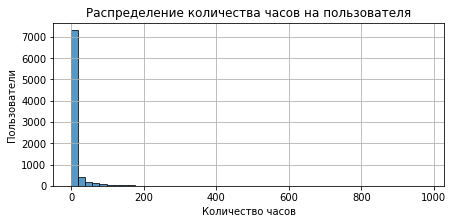

In [16]:
# Проверим данные на аномалии и выбросы
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
yandex_knigi_data['hours'].plot(
                kind='hist', # Тип графика — гистограмма
                bins=50, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение количества часов на пользователя')
plt.xlabel('Количество часов')
plt.ylabel('Пользователи')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

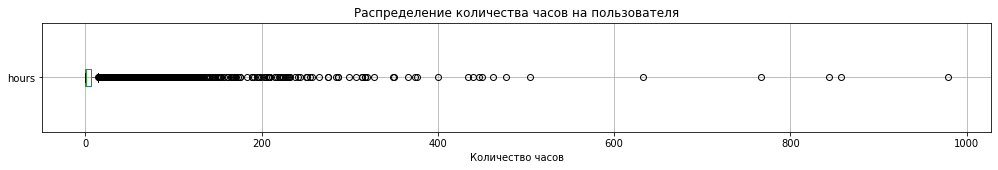

In [17]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(17, 2))

# Строим диаграмму размаха значений в столбце balance
yandex_knigi_data.boxplot(column='hours', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества часов на пользователя')
plt.xlabel('Количество часов')

# Выводим график
plt.show()

In [18]:
yandex_knigi_data['hours'].describe()

count    8296.000000
mean       10.963892
std        37.753906
min         0.000022
25%         0.057493
50%         0.884214
75%         5.944675
max       978.764775
Name: hours, dtype: float64

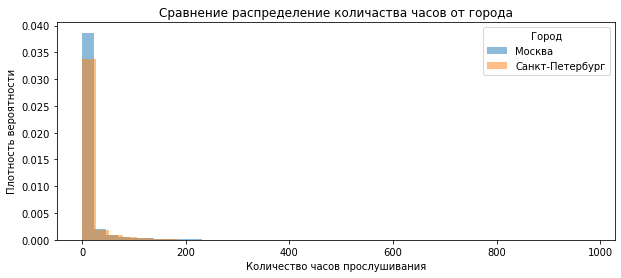

In [30]:
# Строим гистограмму распределения значений возраста
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого города
for i in yandex_knigi_data['city'].unique():
    # Фильтруем данные по городу
    yandex_knigi_data.loc[yandex_knigi_data['city'] == i, 'hours'].plot(
        kind='hist',
        density=True,
        bins=37,
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение количаства часов от города')
plt.xlabel('Количество часов прослушивания')
plt.ylabel('Плотность вероятности')
plt.legend(title='Город')
plt.show()

В теории прослушивание или чтение книг 0,000022 часа крайне мало для нормального распределения. С учетом того что первый квартиль = 0,06 часа (около 4 минут) это может значить о крайне малом использовании платформы. Что может говорить о выбросах в тестируемых группах (не о постоянных клиентах платформы). В правой части гистограммы также имеются выбросы, правосторонний хвост в нашем случае не является явным выбросом, однако с такими данными расчеты среднего могут сместиться в сторону больших значений.  В таком случае ограничим наши данные 1 и 3 квартилем и продолжим анализ данных для дальнейшей оценки гипотезы с помощью t-теста (Т-тест или тест Уэлча)? Как альтернативное решение предлагаю выполнить тест Манна - Уитни.

In [19]:
cleaned_knigi_data=yandex_knigi_data[(yandex_knigi_data[
    'hours'] <= yandex_knigi_data['hours'].quantile(0.75)) & (yandex_knigi_data[
    'hours'] >= yandex_knigi_data['hours'].quantile(0.25))]

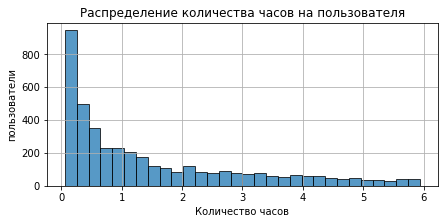

In [20]:
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
cleaned_knigi_data['hours'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=30
    , # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение количества часов на пользователя')
plt.xlabel('Количество часов')
plt.ylabel('пользователи')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 


In [21]:
cleaned_knigi_data['hours'].describe()

count    4148.000000
mean        1.499866
std         1.538307
min         0.057500
25%         0.292670
50%         0.884214
75%         2.332459
max         5.940298
Name: hours, dtype: float64

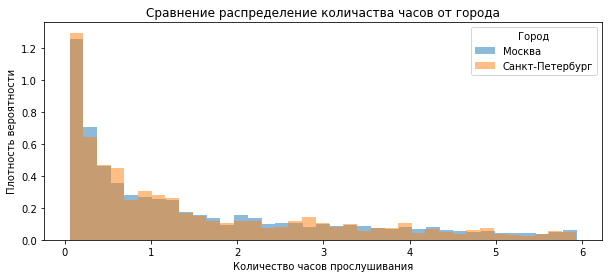

In [29]:
# Строим гистограмму распределения значений возраста
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого города
for i in cleaned_knigi_data['city'].unique():
    # Фильтруем данные по городу
    cleaned_knigi_data.loc[cleaned_knigi_data['city'] == i, 'hours'].plot(
        kind='hist',
        density=True,
        bins=37,
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение количаства часов от города')
plt.xlabel('Количество часов прослушивания')
plt.ylabel('Плотность вероятности')
plt.legend(title='Город')
plt.show()

In [22]:
# Количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения
cleaned_knigi_data[cleaned_knigi_data['city'] == 'Москва']['puid'].nunique(
        ), cleaned_knigi_data[cleaned_knigi_data['city'] == 'Санкт-Петербург']['puid'].nunique()

(2994, 1154)

In [23]:
# Процентная разница в количестве пользователей в группах A и B
percent_difference_test_group= 100 * abs(cleaned_knigi_data[cleaned_knigi_data['city'] == 'Москва']['puid'].nunique(
        ) - cleaned_knigi_data[cleaned_knigi_data['city'] == 'Санкт-Петербург']['puid'].nunique(
        )) / cleaned_knigi_data[cleaned_knigi_data['city'] == 'Москва']['puid'].nunique()
percent_difference_test_group

61.4562458249833

In [24]:
# Процентное распределение
100 * cleaned_knigi_data[cleaned_knigi_data['city'] == 'Москва']['puid'].nunique(
        ) / cleaned_knigi_data['puid'].nunique(
        ), 100 * cleaned_knigi_data[cleaned_knigi_data['city'] == 'Санкт-Петербург']['puid'].nunique(
        ) / cleaned_knigi_data['puid'].nunique()

(72.17936354869816, 27.820636451301834)

In [25]:
metrics_cleaned = cleaned_knigi_data.set_index('city').groupby('city').agg({'hours': np.mean}).T
metrics_cleaned 

city,Москва,Санкт-Петербург
hours,1.512976,1.465851


Средние значения говорят о том что альтернативная гипотеза не подтверждается на нормальном распределении. Но для уверенности необходимо это проверить Т-тестом.  Так как разница в выборке около 60% используем тест Уэлча.  
В связи с тем что до отчистки от выбросов средние значения метрики (среднее время за чтением и прослушиванием книг в приложении) в Москве было меньше, а после стало наоборот.  Чтобы избежать ошибок, проверим гипотезу двумя способами: очищенной от выбросов выборок тестом Уэлча и изначальной выборки с помощью теста Манна — Уитни.


## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Выберем уровень значимости 0,05 оптимальный для продуктовых и маркетинговых гипотез

In [26]:
# Выборка часов проведенного в приложения жителями Москвы
sample_a = cleaned_knigi_data[cleaned_knigi_data['city']=='Москва']['hours']
# Выборка часов проведенного в приложения жителями Санкт-Петербурга
sample_b = cleaned_knigi_data[cleaned_knigi_data['city']=='Санкт-Петербург']['hours']

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    sample_a,
    sample_b,
    equal_var=False,
    alternative='less' # Альтернативная гипотеза, которую проверяем: mu_a < mu_b
)
# Фиксируем уровень значимости
alpha = 0.05

if p_value_welch_ttest>alpha:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 2)}')
    print('Не получилось отвергнуть нулевую гипотезу! Выборочные средние в группах A и B равны.')
    print('Интерпретация: пользователи из Санкт-Петербурга проводят столько же времени за чтением и прослушиванием книг в приложении, как и пользователи из Москвы')
else:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 2)}')
    print('Отвергаем нулевую гипотезу! Выборочные средние в группах A и B не равны, и в группе B больше.')
    print('Интерпретация: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы')

p-value теста Уэлча =0.81
Не получилось отвергнуть нулевую гипотезу! Выборочные средние в группах A и B равны.
Интерпретация: пользователи из Санкт-Петербурга проводят столько же времени за чтением и прослушиванием книг в приложении, как и пользователи из Москвы


In [27]:
# Проверим изначальную выборку с помощью теста Манна — Уитни

a = yandex_knigi_data[yandex_knigi_data['city']=='Москва']['hours']
b = yandex_knigi_data[yandex_knigi_data['city']=='Санкт-Петербург']['hours']
# Фиксируем уровень значимости
alpha = 0.05
mw_test = mannwhitneyu(
    a, # Выборка значений метрики для группы из Москвы
    b, # Выборка значений метрики для группы из Санкт-Петербурга
    alternative='less' # Выбираем двустороннюю гипотезу 
                            # alternative='less' соответствует альтернативной гипотезе: Dist(a)<Dist(b)
                            # alternative='greater' соответствует альтернативной гипотезе: Dist(a)>Dist(b)
)
if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Распределения метрики в группах A и B равны')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Распределения метрики в группах A и B различаются')

pvalue=0.4532273739367588 > 0.05
Нулевая гипотеза находит подтверждение! Распределения метрики в группах A и B равны


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



С целью проверить гипотезы, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Была проведена проверка данных. Для приведения независимости выборок было удалено 6% данных или 488 строк данных (неявных дубликатов), т.к. 244 пользователя находились как в Москве так и в Санкт-Петербурге.   
Ключевая метрика – среднее время использования приложения в часах для целевых выборок.  
Выборки имеют перекос, в группе использующей приложения из Москвы на 60% данных больше чем в группе из Санкт-Петербурга.  
Средние значения выборки имеют подтверждение альтернативной гипотезы, 10,85 для Москвы и 11,26 для Санкт-Петербурга. Но данные имеют большое количество выбросов как в виде очень короткого использования платформы, так и долгого использования платформы, что очень сильно влияет на ключевую метрику.   
Выборка приведена к нормальному распределению ограничением основной выборки 1 и 3 квартилем. Без выбросов метрики не подтверждают альтернативную гипотезу, средние значения 1,51 для Москвы и 1,47 для Санкт-Петербурга.  
Чтобы избежать ошибок, решено проверить гипотезы двумя способами, для чистых данных освобождённых от выбросов выбран t-тест. Так как выборки имеют перекос в 60 % выбран t-тест Уэлча. А для изначальная выборка со всеми выбросами проверена с помощью теста Манна — Уитни.  
Уровень значимости выбран 5%, оптимальный для продуктовых и маркетинговых гипотез.   
p-value теста Уэлча =0.81, p-value > уровня значимости, что говорит о том что не получилось отвергнуть нулевую гипотезу! Выборочные средние в группах A и B равны. Соответственно пользователи из Санкт-Петербурга проводят столько же времени за чтением и прослушиванием книг в приложении, как и пользователи из Москвы.  
Проверка вторым методом показала, что p-value теста Манна — Уитни =0.4532273739367588, что > 0.05, соответственно нулевая гипотеза находит подтверждение! Распределения метрики в группах A и B равны.  
Предположительно, за счет того, что Москва больше чем Санкт-Петербург, то и распределение пользователей разделилось таким же способом. Но проверка тестами доказывает, что **люди пользуются приложением и проводят время за прослушиванием и чтением книг - одинаково как в Москве так и в Санкт-Петербурге**.


----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



Целью исследования является проверка гипотезы.  
Гипотеза заключается в следующем: упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта.  
Для этого необходимо:  
•	загрузить данные теста;  
•	проверить корректность его проведения;  
•	проанализировать полученные результаты;  
•	сделать вывод.   
Целевое действие - `purchase` в столбце `details`.   
Ключевая метрика: Конверсия в течении 7 дней, или пользователи которые с момента регистрации в течении 7 дней сделали кокупку (`purchase`).   
Конверсия = Количество уникальных пользователей совершивших целевое действие деленное на количество всех уникальных пользователей.  
Для проверки нам нужен статистический тест, который позволит определить, существует ли значимая разница между пользователями с целевым действием по отношению ко всем пользователям в двух независимых выборках - это Z-тест пропорций.  

## 2. Загрузите данные, оцените их целостность.


In [31]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [32]:
participants

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
...,...,...,...,...
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC
14522,FFF28D02B1EACBE1,B,recommender_system_test,PC
14523,FFF28D02B1EACBE1,B,interface_eu_test,PC


In [33]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


In [34]:
# Проверяем уникальные значения в столбцах
for column in ['group', 'ab_test', 'device']:
    print(f'Уникальные значения в столбце {column}:')
    print(participants[column].sort_values().unique())
    print()

Уникальные значения в столбце group:
['A' 'B']

Уникальные значения в столбце ab_test:
['interface_eu_test' 'recommender_system_test']

Уникальные значения в столбце device:
['Android' 'Mac' 'PC' 'iPhone']



In [35]:
participants.duplicated().sum()

0

In [36]:
participants.duplicated(['user_id', 'ab_test']).sum()

0

In [37]:
participants.duplicated(['user_id', 'group']).sum()

441

In [38]:
participants[participants.duplicated(['user_id', 'group'], keep=False)]


,user_id,group,ab_test,device
25,0082295A41A867B5,A,interface_eu_test,iPhone
26,0082295A41A867B5,A,recommender_system_test,iPhone
41,00E68F103C66C1F7,A,recommender_system_test,PC
42,00E68F103C66C1F7,A,interface_eu_test,PC
116,02313B9E82255F47,A,recommender_system_test,Mac
...,...,...,...,...
14459,FEA0C585A53E7027,B,recommender_system_test,Android
14465,FEC0BCA6C323872F,A,recommender_system_test,PC
14466,FEC0BCA6C323872F,A,interface_eu_test,PC
14522,FFF28D02B1EACBE1,B,recommender_system_test,PC


In [39]:
# 441 пользователь участвует в двух тестах, уточним это
users_eu_tests = participants[participants['ab_test']=='interface_eu_test']['user_id']
users_2_tests = users_eu_tests[users_eu_tests.isin(participants[participants['ab_test']=='recommender_system_test']['user_id'])]
participants[participants['user_id'].isin(users_2_tests)]

,user_id,group,ab_test,device
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
9,00341D8401F0F665,A,recommender_system_test,iPhone
10,00341D8401F0F665,B,interface_eu_test,iPhone
25,0082295A41A867B5,A,interface_eu_test,iPhone
...,...,...,...,...
14490,FF2174A1AA0EAD20,A,recommender_system_test,Android
14495,FF44696E39039D29,B,interface_eu_test,Mac
14496,FF44696E39039D29,A,recommender_system_test,Mac
14522,FFF28D02B1EACBE1,B,recommender_system_test,PC


In [40]:
# Посчитаем и зафиксируем количество строк в Датафрейме
count_str_begin = participants.shape[0]
count_str_begin

14525

In [41]:
# 1774 записи пользователей учавствующих в двух конкурирующих тестах
# По условиям задачи это не допустимо, удалим их из Датафрейма
participants=participants[~participants['user_id'].isin(users_2_tests)]
participants

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android
...,...,...,...,...
14518,FFE5B14BD55C1C5C,A,interface_eu_test,PC
14519,FFE600EEC4BA7685,B,interface_eu_test,Android
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC


In [42]:
# Так как результаты recommender_system_test нам больше не нужны, для дальнейшего удобства удалим их из Датафрейма
participants=participants[~(participants['ab_test']=='recommender_system_test')]
participants

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android
7,0031F1B5E9FBF708,A,interface_eu_test,Android
...,...,...,...,...
14518,FFE5B14BD55C1C5C,A,interface_eu_test,PC
14519,FFE600EEC4BA7685,B,interface_eu_test,Android
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC


In [43]:
# Посчитаем и зафиксируем количество строк оставшихся в Датафрейме и долю удаленнх
count_str_end = participants.shape[0]
count_str_begin
count_str_del = count_str_begin-count_str_end
share_str_del = round(count_str_del/count_str_begin*100,2)
print(f"Всего в DataFrame найдено дубликатов и удалено {count_str_del} или {share_str_del}% от всего количества строк")

Всего в DataFrame найдено дубликатов и удалено 4562 или 31.41% от всего количества строк


<Figure size 504x216 with 0 Axes>

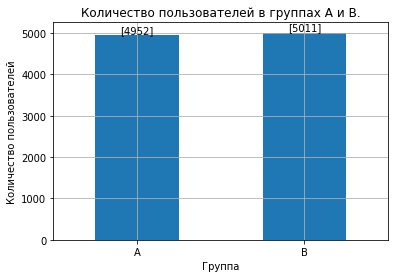

In [44]:
# Выведем распределение пользователей в группах А и В
test_uniq_users=pd.pivot_table(participants, index='group', values='user_id', aggfunc='nunique')
test_uniq_users.value_counts(normalize=True)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
test_uniq_users.plot(
               kind='bar', # Тип графика — столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество пользователей в группах A и B.'
)
# Добавляем обозначения на график
for i, v in enumerate(test_uniq_users.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Настраиваем оформление графика
plt.xlabel('Группа')
plt.ylabel('Количество пользователей')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

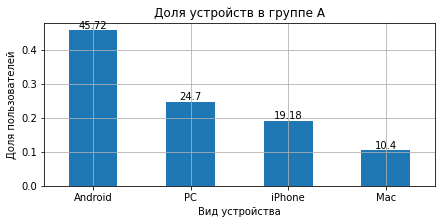

In [45]:
group_A_devices = round(participants[participants['group'] == 'A'].drop_duplicates(
    'user_id')['device'].value_counts(normalize=True),4)
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
group_A_devices.plot(
               kind='bar', # Тип графика — столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Доля устройств в группе A'
)

# Настраиваем оформление графика
plt.xlabel('Вид устройства')
plt.ylabel('Доля пользователей')
# Добавляем сетку графика
plt.grid()
# Подписываем каждое значение сверху каждого столбика
for i, v in enumerate(group_A_devices.values):
    plt.text(i, v, str(v*100), ha='center', va='bottom')

# Выводим график
plt.show()

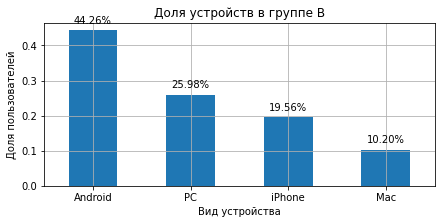

In [46]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
group_B_devices=participants[participants['group'] == 'B'].drop_duplicates(
    'user_id')['device'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика — столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Доля устройств в группе B'
)

# Настраиваем оформление графика
plt.xlabel('Вид устройства')
plt.ylabel('Доля пользователей')
# Добавляем сетку графика
plt.grid()
# Подписываем каждое значение сверху каждого столбика
for p in group_B_devices.patches:
    height = p.get_height()
    group_B_devices.annotate(f'{height:.2%}', xy=(p.get_x() + p.get_width() / 2., height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
# Выводим график
plt.show()

Мы провели анализ предоставленных данных. Пересечение пользователей из тестовой и контрольной групп удалены. Также удалена группа из другого А/В теста. Всего в DataFrame найдено дубликатов и удалено 4562 или 31.41% от всего количества строк.
Количество пользователей в группах A и B почти одинаково (4952 и 5011). Разница между группами минимальна.   
Обе группы независимы, друг от друга.  Обе группы равномерно распределены по категориям, по типам устройств отличия минимальны не более пару процентов между категориями.

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [47]:
events

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN
...,...,...,...,...
787281,1A655C280B064708,2020-12-31 23:57:44,product_page,NaN
787282,B77B2F4BCA134618,2020-12-31 23:58:23,registration,0.0
787283,GLOBAL,2020-12-31 23:58:30,product_cart,NaN
787284,B12AD1623E494FAD,2020-12-31 23:58:34,registration,-6.52


In [48]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


In [49]:
# Проверяем уникальные значения в столбцах
for column in ['event_name', 'details']:
    print(f'Уникальные значения в столбце {column}:')
    print(events[column].sort_values().unique())
    print()

Уникальные значения в столбце event_name:
['End of Black Friday Ads Campaign' 'Start of CIS New Year Gift Lottery'
 'Start of Christmas&New Year Promo' 'login' 'product_cart' 'product_page'
 'purchase' 'registration']

Уникальные значения в столбце details:
['-0.4' '-0.41' '-0.43' '-0.45' '-0.48' '-0.5' '-0.81' '-0.86' '-0.88'
 '-0.9' '-0.95' '-1.0' '-1.22' '-1.26' '-1.29' '-1.35' '-1.42' '-1.5'
 '-1.63' '-1.69' '-1.71' '-1.8' '-1.9' '-2.0' '-2.04' '-2.14' '-2.26'
 '-2.3' '-2.38' '-2.44' '-2.5' '-2.57' '-2.71' '-2.85' '-3.0' '-3.16'
 '-3.26' '-3.32' '-3.43' '-3.5' '-3.61' '-3.67' '-3.8' '-3.83' '-3.86'
 '-3.93' '-4.0' '-4.06' '-4.07' '-4.2' '-4.26' '-4.27' '-4.29' '-4.46'
 '-4.48' '-4.5' '-4.51' '-4.69' '-4.72' '-4.75' '-4.89' '-4.96' '-5.0'
 '-5.14' '-5.22' '-5.29' '-5.41' '-5.5' '-5.57' '-5.7' '-5.87' '-6.0'
 '-6.11' '-6.18' '-6.32' '-6.43' '-6.5' '-6.52' '-6.65' '-6.77' '-6.86'
 '-6.92' '-7.0' '-7.12' '-7.22' '-7.29' '-7.33' '-7.5' '-7.6' '-7.67'
 '-7.72' '-7.74' '-8.0' '-8.07' '-8.

In [50]:
# Даты проведедения эксперимента
events['event_dt'].min(), events['event_dt'].max()

(Timestamp('2020-12-01 00:00:00'), Timestamp('2020-12-31 23:59:48'))

In [51]:
events[events.duplicated()].sort_values('user_id')

,user_id,event_dt,event_name,details
346517,000199F1887AE5E6,2020-12-15 07:28:44,product_page,NaN
309140,000199F1887AE5E6,2020-12-14 09:57:42,login,NaN
346519,000199F1887AE5E6,2020-12-15 07:28:44,product_page,NaN
346520,000199F1887AE5E6,2020-12-15 07:28:44,product_page,NaN
589491,0002499E372175C7,2020-12-22 03:51:20,login,NaN
...,...,...,...,...
330908,GLOBAL,2020-12-14 22:06:02,product_page,NaN
660387,GLOBAL,2020-12-24 04:56:08,product_cart,NaN
331441,GLOBAL,2020-12-14 22:22:14,product_page,NaN
750055,GLOBAL,2020-12-28 23:33:19,purchase,4.49


In [52]:
# Проверяем, есть ли в таблице participants пользователи которых нет в events
participants[~participants['user_id'].isin(events['user_id'])]

,user_id,group,ab_test,device


In [53]:
# Объединим таблицы в новый Дф, так чтобы действия из таблицы events были доступны для всех пользователей таблицы participants
df=participants.merge(events, on='user_id', how='left')
df

,user_id,group,ab_test,device,event_dt,event_name,details
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38
1,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:49,login,NaN
2,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:57,login,NaN
3,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:38:54,login,NaN
4,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-08 22:15:35,login,NaN
...,...,...,...,...,...,...,...
73810,FFEFC0E55C1CCD4F,A,interface_eu_test,PC,2020-12-13 23:52:22,login,NaN
73811,FFEFC0E55C1CCD4F,A,interface_eu_test,PC,2020-12-28 00:29:10,login,NaN
73812,FFF58BC33966EB51,A,interface_eu_test,Android,2020-12-13 17:37:34,registration,-0.45
73813,FFF58BC33966EB51,A,interface_eu_test,Android,2020-12-13 17:56:02,login,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73815 entries, 0 to 73814
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     73815 non-null  object        
 1   group       73815 non-null  object        
 2   ab_test     73815 non-null  object        
 3   device      73815 non-null  object        
 4   event_dt    73815 non-null  datetime64[ns]
 5   event_name  73815 non-null  object        
 6   details     19450 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 4.5+ MB


- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [55]:
# Выведем в отдельный Датафрейм зарегистрировавшихся пользователей
df_registration = df[df['event_name']=='registration']
df_registration 

,user_id,group,ab_test,device,event_dt,event_name,details
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38
11,001E72F50D1C48FA,A,interface_eu_test,Mac,2020-12-17 15:44:05,registration,-3.61
18,002412F1EB3F6E38,B,interface_eu_test,Mac,2020-12-09 09:36:50,registration,-0.48
26,002540BE89C930FB,B,interface_eu_test,Android,2020-12-08 18:06:07,registration,-2.38
35,0031F1B5E9FBF708,A,interface_eu_test,Android,2020-12-14 00:47:10,registration,-2.26
...,...,...,...,...,...,...,...
73784,FFE5B14BD55C1C5C,A,interface_eu_test,PC,2020-12-19 06:27:24,registration,-0.45
73787,FFE600EEC4BA7685,B,interface_eu_test,Android,2020-12-13 21:43:31,registration,-2.26
73794,FFE7FC140521F5F6,A,interface_eu_test,PC,2020-12-23 09:10:16,registration,-3.43
73809,FFEFC0E55C1CCD4F,A,interface_eu_test,PC,2020-12-13 23:52:15,registration,0.0


In [56]:
# Выведем на экран Датафрейм с пользователями которые совершили покупку
df_purchase = df[(df['event_name']=='purchase')]
df_purchase = df_purchase.groupby('user_id')['event_dt'].min().reset_index()
df_purchase

,user_id,event_dt
0,0031F1B5E9FBF708,2020-12-15 18:54:51
1,004C58ADE7CA8C4A,2020-12-20 01:13:34
2,0050F43F34C955F4,2020-12-13 19:44:29
3,0053DD654C9513D6,2020-12-15 08:46:21
4,0082A350AF0647FA,2020-12-26 18:22:56
...,...,...
3415,FF827554725859E2,2020-12-28 18:57:32
3416,FFA72985E689ABBB,2020-12-18 19:16:48
3417,FFD58017F5FA2DAC,2020-12-16 22:57:35
3418,FFE40BDB7364E966,2020-12-24 18:57:56


In [57]:
# Объединим в один датафрей купивших пользователей
df_metric = df_registration.merge(df_purchase, on='user_id', how='right')
df_metric

,user_id,group,ab_test,device,event_dt_x,event_name,details,event_dt_y
0,0031F1B5E9FBF708,A,interface_eu_test,Android,2020-12-14 00:47:10,registration,-2.26,2020-12-15 18:54:51
1,004C58ADE7CA8C4A,B,interface_eu_test,Android,2020-12-18 15:14:53,registration,-0.45,2020-12-20 01:13:34
2,0050F43F34C955F4,A,interface_eu_test,PC,2020-12-13 19:41:56,registration,0.0,2020-12-13 19:44:29
3,0053DD654C9513D6,B,interface_eu_test,PC,2020-12-12 04:35:20,registration,-6.65,2020-12-15 08:46:21
4,0082A350AF0647FA,A,interface_eu_test,PC,2020-12-22 21:34:49,registration,0.0,2020-12-26 18:22:56
...,...,...,...,...,...,...,...,...
3415,FF827554725859E2,A,interface_eu_test,Mac,2020-12-23 03:50:20,registration,-2.14,2020-12-28 18:57:32
3416,FFA72985E689ABBB,A,interface_eu_test,PC,2020-12-15 20:18:10,registration,-4.51,2020-12-18 19:16:48
3417,FFD58017F5FA2DAC,A,interface_eu_test,Android,2020-12-13 00:55:02,registration,-2.26,2020-12-16 22:57:35
3418,FFE40BDB7364E966,A,interface_eu_test,Android,2020-12-22 04:07:47,registration,0.0,2020-12-24 18:57:56


In [58]:
# Выделим в отдельный столбец пользователей, совершивших покупки в первые семь дней с момента регистрации
df_metric['7days_purchase'] = (df_metric['event_dt_y'].dt.date >= df_metric['event_dt_x']) & \
                       (df_metric['event_dt_y'].dt.date <= df_metric['event_dt_x'] + pd.to_timedelta('7 D'))

# Выводим данные на экран
df_metric

,user_id,group,ab_test,device,event_dt_x,event_name,details,event_dt_y,7days_purchase
0,0031F1B5E9FBF708,A,interface_eu_test,Android,2020-12-14 00:47:10,registration,-2.26,2020-12-15 18:54:51,True
1,004C58ADE7CA8C4A,B,interface_eu_test,Android,2020-12-18 15:14:53,registration,-0.45,2020-12-20 01:13:34,True
2,0050F43F34C955F4,A,interface_eu_test,PC,2020-12-13 19:41:56,registration,0.0,2020-12-13 19:44:29,True
3,0053DD654C9513D6,B,interface_eu_test,PC,2020-12-12 04:35:20,registration,-6.65,2020-12-15 08:46:21,True
4,0082A350AF0647FA,A,interface_eu_test,PC,2020-12-22 21:34:49,registration,0.0,2020-12-26 18:22:56,True
...,...,...,...,...,...,...,...,...,...
3415,FF827554725859E2,A,interface_eu_test,Mac,2020-12-23 03:50:20,registration,-2.14,2020-12-28 18:57:32,True
3416,FFA72985E689ABBB,A,interface_eu_test,PC,2020-12-15 20:18:10,registration,-4.51,2020-12-18 19:16:48,True
3417,FFD58017F5FA2DAC,A,interface_eu_test,Android,2020-12-13 00:55:02,registration,-2.26,2020-12-16 22:57:35,True
3418,FFE40BDB7364E966,A,interface_eu_test,Android,2020-12-22 04:07:47,registration,0.0,2020-12-24 18:57:56,True


In [59]:
# Удалим пользователей не осуществлявших покупки в первые 7 дней
df_metric= df_metric[~(df_metric['7days_purchase']==False)]
df_metric

,user_id,group,ab_test,device,event_dt_x,event_name,details,event_dt_y,7days_purchase
0,0031F1B5E9FBF708,A,interface_eu_test,Android,2020-12-14 00:47:10,registration,-2.26,2020-12-15 18:54:51,True
1,004C58ADE7CA8C4A,B,interface_eu_test,Android,2020-12-18 15:14:53,registration,-0.45,2020-12-20 01:13:34,True
2,0050F43F34C955F4,A,interface_eu_test,PC,2020-12-13 19:41:56,registration,0.0,2020-12-13 19:44:29,True
3,0053DD654C9513D6,B,interface_eu_test,PC,2020-12-12 04:35:20,registration,-6.65,2020-12-15 08:46:21,True
4,0082A350AF0647FA,A,interface_eu_test,PC,2020-12-22 21:34:49,registration,0.0,2020-12-26 18:22:56,True
...,...,...,...,...,...,...,...,...,...
3415,FF827554725859E2,A,interface_eu_test,Mac,2020-12-23 03:50:20,registration,-2.14,2020-12-28 18:57:32,True
3416,FFA72985E689ABBB,A,interface_eu_test,PC,2020-12-15 20:18:10,registration,-4.51,2020-12-18 19:16:48,True
3417,FFD58017F5FA2DAC,A,interface_eu_test,Android,2020-12-13 00:55:02,registration,-2.26,2020-12-16 22:57:35,True
3418,FFE40BDB7364E966,A,interface_eu_test,Android,2020-12-22 04:07:47,registration,0.0,2020-12-24 18:57:56,True


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [60]:
# Задаём параметры
alpha = 0.05  # Уровень значимости
power = 0.8  # Мощность теста
beta = 1 - power  # Ошибка второго рода, часто 1 - мощность
mde = 0.03  # Минимальный детектируемый эффект

p1 = 0.3  # Базовая конверсия 
p2 = p1 + mde
effect_size = (p2 - p1) / np.sqrt((p1*(1-p1) + p2*(1-p2))/2)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size, 
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

# Общее количество посетителей в выборках А и В
n_a = df[df['group'] == 'A']['user_id'].nunique()
n_b = df[df['group'] == 'B']['user_id'].nunique()

if n_a > sample_size:
    print(f"Общее количество посетителей в выборке А={n_a}, что достаточность для получения статистически значимых результатов A/B-теста")
else:
    print(f"Общее количество посетителей в выборке B={n_a}, что не достаточность для получения статистически значимых результатов A/B-теста")
if n_a > sample_size:
    print(f"Общее количество посетителей в выборке B={n_b}, что достаточность для получения статистически значимых результатов A/B-теста")
else:
    print(f"Общее количество посетителей в выборке B={n_b}, что не достаточность для получения статистически значимых результатов A/B-теста")   

Необходимый размер выборки для каждой группы: 3759
Общее количество посетителей в выборке А=4952, что достаточность для получения статистически значимых результатов A/B-теста
Общее количество посетителей в выборке B=5011, что достаточность для получения статистически значимых результатов A/B-теста


- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [61]:
# Общее количество посетителей в выборках А и В посчитано, рассчитаем количество посетителей сделавших покупку.
m_a = df_metric[df_metric['group'] == 'A']['user_id'].nunique()
m_b = df_metric[df_metric['group'] == 'B']['user_id'].nunique()

print(f'Количество посетителей группы А, сделавших покупку = {m_a}, а общее количество посетителей = {n_a}')
print(f'Количество посетителей группы В, сделавших покупку = {m_b}, а общее количество посетителей = {n_b}')

Количество посетителей группы А, сделавших покупку = 1411, а общее количество посетителей = 4952
Количество посетителей группы В, сделавших покупку = 1519, а общее количество посетителей = 5011


In [62]:
p_a, p_b = m_a/n_a, m_b/n_b # рассчитываем доли успехов для каждой группы: A и B
print(f'Конверсия в группе А={p_a}, Конверсия в группе В={p_b}')

Конверсия в группе А=0.28493537964458804, Конверсия в группе В=0.3031331071642387


In [63]:
# Посчитаем на сколько конверсия зарегистрированных пользователей в покупателей из группы В увеличилась в сравнении с группой А
(p_b-p_a)/p_a*100

6.3866156397810085

In [64]:
# Расчитаем на сколько увеличилась конверсия в группе B
minimal_effect=round(p_b*100-p_a*100,2)
print(f'Конверсия в группе В увеличилась на {minimal_effect}%')

Конверсия в группе В увеличилась на 1.82%


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

Мы рассчитали общее количество посетителей в двух выборках (Группа А = 4952 и Группа В = 5011).   
Рассчитали необходимый размер выборки для каждой группы: 3759.  
Целевым действием является то, что в течение семи дней после регистрации в системе зарегистрированный пользователь совершит покупку.  
Количество посетителей совершивших целевое действие (Группа А = 1411 и Группа В = 1519).  
Гипотеза заключается в следующем: упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе **конверсия зарегистрированных пользователей в покупателей увеличится** как минимум **на три процентных пункта**.  
Конверсия Группы А = 0,2849 (28,49%) и Группа В = 0,3031 (30,31%).  
Таким образом конверсия в группе В увеличилась на 1.82%. Необходимо убедиться, что полученный результат статистически значим.


## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Чтобы убедиться, что результаты статистически значимы необходимо провести статистический тест.  
Для этого зафиксируем нашу гипотезу:  
Нулевая гипотеза: конверсия зарегистрированных пользователей не увеличилась (конверсии в двух группах равны).
Альтернативная гипотеза: конверсия зарегистрированных пользователей в группе В больше чем в группе А.  
Используем для проверки Z-тест пропорций.

In [65]:
# Прежде чем провести статистический тест убедимся в достаточном количестве данных
if (p_a*n_a > 10)and((1-p_a)*n_a > 10)and(p_b*n_b > 10)and((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')

Предпосылка о достаточном количестве данных выполняется!


In [66]:
alpha = 0.05 ## на каком уровне значимости проверяем гипотезу о равенстве вероятностей

stat_ztest, p_value_ztest = proportions_ztest(
    [m_a, m_b],
    [n_a, n_b],
    alternative='smaller' # так как H_1: p_a < p_b
)
p_value_ztest


if p_value_ztest > alpha:
    print(f'pvalue={p_value_ztest} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
    print('Упрощение интерфейса не увеличило конверсию зарегистрированных пользователей в покупателей в течение семи дней после регистрации в системе.')
else:
    print(f'pvalue={p_value_ztest} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')
    print(f'Упрощение интерфейса привело к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличилась на {minimal_effect}%.')

pvalue=0.023117327881967534 < 0.05
Нулевая гипотеза не находит подтверждения!
Упрощение интерфейса привело к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличилась на 1.82%.


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

Мы провели анализ предоставленных данных. С целью приведения двух выборок к независимости друг от друга удалены пересечения пользователей из тестовой и контрольной групп. Также удалена группа из другого А/В теста. Всего в DataFrame `participants` найдено участвующих одновременно в двух тестовых группах и удалены результаты `recommender_system_test` на 4562 строк или 31.41% от всего количества строк.  
Проведена проверка равномерности распределения пользователей по группам теста. Все группы распределены равномерно, результаты двух выборок независимы друг от друга.  
Все пользователи участвующие в тесте были объединены в один датафрейм с таблицей о действиях этих пользователей. Эксперимент проводился один месяц с 01.12.2020 по 31.12.2020.  
Общее количество посетителей в Группе А составило - 4952, а в Группе В - 5011.   
Рассчитан необходимый размер выборки для каждой группы: 3759.  
Что подтвердило достаточность для получения статистически значимых результатов A/B-теста.  
Целевым действием является то, что в течение семи дней после регистрации в системе зарегистрированный пользователь совершит покупку.    
Количество посетителей совершивших целевое действие (Группа А = 1411 и Группа В = 1519).  
Гипотеза заключается в следующем: упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта.   

Конверсия Группы А = 28,49% и Группа В = 30,31%.
Мы посчитали, что в результате эксперимента конверсия в группе B выросла на 1.82%.
Для проверки выбран Z-тест пропорций. Результаты теста подтвердили альтернативную гипотезу.   
Можно с вероятностью 95% утверждать, что упрощение интерфейса привело к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличилась на 1.82 процентных пункта. Но это меньше ожидаемого результата в 3%.  
Можно с уверенностью сказать, что **эксперимент проведен корректно, но ожидаемого результата, увеличения конверсии в 3% новый интерфейс не дает**.   
**Соответственно версию сайта нужно еще улучшать!**